In [ ]:
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns

In [ ]:
# tips 데이터셋 로드 
tips = sns.load_dataset('tips')
tips

# 문제
1. 컬럼의 이름 변경 = ['총금액', '팁', '성별', '흡연여부', '요일', '시간', '인원']
2. '팁의 비율' 새로운 컬럼을 생성
    - (팁 / (총금액 - 팁)) * 100
3. '인원', '성별'을 기준으로 그룹화 하여 팁의 비율의 평균 값 출력
4. 해당하는 그룹 데이터를 바형 그래프로 시각화하여 표시


In [5]:
# 시각화 라이브러리 로드 
import matplotlib.pyplot as plt
# os 정보를 불러오는 라이브러리
import platform

In [6]:
# 그래프의 한글 깨짐 방지
if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else :
    plt.rc('font', family = 'Malgun Gothic')

In [7]:
df = tips.copy()
# 컬럼의 이름을 변경 
df.columns = ['총금액', '팁', '성별', '흡연여부', '요일', '시간', '인원']

df.head(1)

,총금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2


In [9]:
# 팁의 비율 이라는 파생변수 생성
# (팁 / (총금액 -팁)) * 100
df['팁의 비율'] = (df['팁'] / (df['총금액'] - df['팁'])) * 100

In [10]:
df.head(3)

,총금액,팁,성별,흡연여부,요일,시간,인원,팁의 비율
0,16.99,1.01,Female,No,Sun,Dinner,2,6.320401
1,10.34,1.66,Male,No,Sun,Dinner,3,19.124424
2,21.01,3.50,Male,No,Sun,Dinner,3,19.988578


In [12]:
# 팁의 비율을 소수점 3번째 자리에서 반올림
# 반올림 함수 : round(소수점 자리수)
df['팁의 비율'] = df['팁의 비율'].round(2)

In [19]:
# '인원', '성별'을 기준으로 그룹화하여 팁의 비율의 평균을 출력
group_data = df[['인원', '성별', '팁의 비율']].groupby(['인원', '성별']).mean()

In [22]:
# x축의 값들은 index의 값을 대체하기 위해 index를 출력
group_data.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

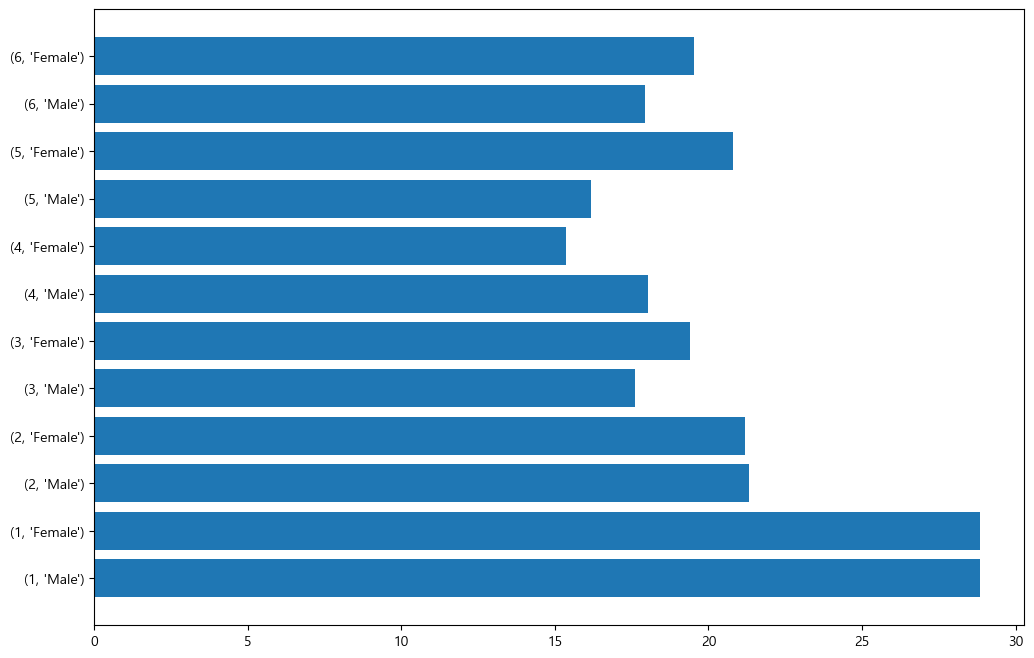

In [26]:
# 바형 그래프 시각화

x = list(range(len(group_data)))
y = group_data['팁의 비율']
plt.figure(figsize=(12, 8))
plt.barh(x, y)
# x축의 값들을 다른 값으로 대체
plt.yticks(x, group_data.index)

plt.show()

In [33]:
# pivot_table을 이용하여 그룹화
pivot_data =  pd.pivot_table(
    df, # pivot_table의 기준 데이터프레임
    index = '성별', 
    columns = '인원', 
    values = ['팁의 비율'], 
    aggfunc= 'mean'
)

<Axes: xlabel='성별'>

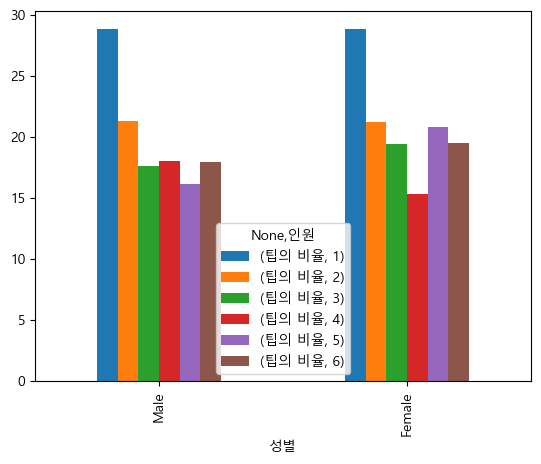

In [34]:
# 시각화
pivot_data.plot.bar()